In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#uploading files
from google.colab import files
uploaded=files.upload()

Saving HKPFItems.v2i.folder.zip to HKPFItems.v2i.folder.zip


In [ ]:
!unzip HKPFItems.v2i.folder.zip

Archive:  HKPFItems.v2i.folder.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
   creating: test/HKID_Card/
 extracting: test/HKID_Card/12_jpg.rf.b15df6a6cf1101ebbdf3787a1e3d0d6c.jpg  
 extracting: test/HKID_Card/2_jpg.rf.882b78ff04fe77d1cefc97158d7b6487.jpg  
 extracting: test/HKID_Card/4_jpg.rf.d28a30cae99a1514da82d751883eba0c.jpg  
   creating: test/Octopus_Card/
 extracting: test/Octopus_Card/oc10_jpg.rf.c5291cbf503991a09b701b95010091af.jpg  
 extracting: test/Octopus_Card/oc14_jpg.rf.f661bd3f291b75053642314e8b33ca41.jpg  
 extracting: test/Octopus_Card/oc3_jpg.rf.d42f5165928812c4d54aa4c678bbace5.jpg  
   creating: train/
   creating: train/HKID_Card/
 extracting: train/HKID_Card/10_jpg.rf.61442b75bc034221152f5432c7e14358.jpg  
 extracting: train/HKID_Card/13_jpg.rf.8cc065d4e20c9f27c3087ff7eb736a81.jpg  
 extracting: train/HKID_Card/14_jpg.rf.2826a9f4c6c0907f3df3bf5e1554fedf.jpg  
 extracting: train/HKID_Card/15_jpg.rf.c5a7bc2326d9

In [ ]:
#loading and prepeocessing data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)


train_data= train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

validation_data= valid_datagen.flow_from_directory(
    '/content/valid',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_data= valid_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
#defining model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model=Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'),BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'),BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation='relu'),BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compiling model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,865 (9.39 MB)

 Trainable params: 2,460,865 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#early_stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

#Training the model
history = model.fit(
    train_data,
    epochs=100,
    batch_size=8,
    validation_data=validation_data,
    callbacks=[early_stopping]
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5208 - loss: 0.8105 - val_accuracy: 0.4000 - val_loss: 0.6946
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5375 - loss: 0.7495 - val_accuracy: 0.5000 - val_loss: 0.7042
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5854 - loss: 0.7366 - val_accuracy: 0.6000 - val_loss: 0.6884
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8297 - loss: 0.5528 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5771 - loss: 0.7044 - val_accuracy: 0.6000 - val_loss: 0.6808
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5531 - loss: 0.6746 - val_accuracy: 0.6000 - val_loss: 0.6791
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5760 - loss: 0.6663 - val_accuracy: 0.6000 - val_loss: 0.6747
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4510 - loss: 0.7495 - val_accuracy: 0.6000 - val_loss: 0

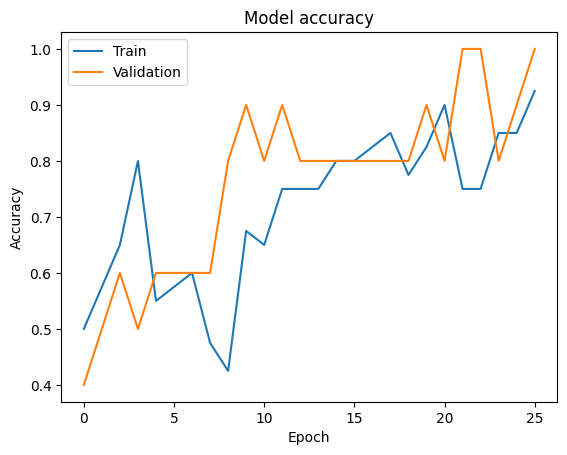

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

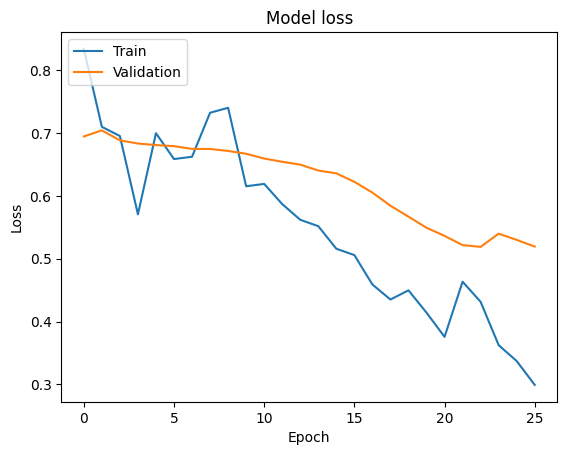

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.4015
